## Введение в искусственные нейронные сети
### Урок 5. Рекуррентные нейронные сети

1. Попробуйте обучить нейронную сеть RNN/LSTM/GRU на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний).

2. Опишите, какой результат вы получили? Что помогло вам улучшить ее точность?

In [1]:
import numpy
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import math
from datetime import datetime

from keras.models import Sequential, Model
from keras.layers import Dense
from tensorflow.keras.layers import Input
from keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.layers import Dense, Activation, Dropout
from keras.layers.recurrent import SimpleRNN, LSTM, GRU

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Загрузка, предварительный анализ и подготовка данных. 

### Загрузка и визуальный анализ 

In [3]:
# Загрузка датасета
airline_passengers_df = pd.read_csv('airline-passengers.csv',engine='python', skipfooter=5)
print(airline_passengers_df.keys())

Index(['Month', 'Passengers'], dtype='object')


In [4]:
# Визуальный анализ набора 
airline_passengers_df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
airline_passengers_df.tail()

,Month,Passengers
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535
138,1960-07,622


In [6]:
# Быстрый анализ типов данных и наличия пропусков 
airline_passengers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       139 non-null    object
 1   Passengers  139 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


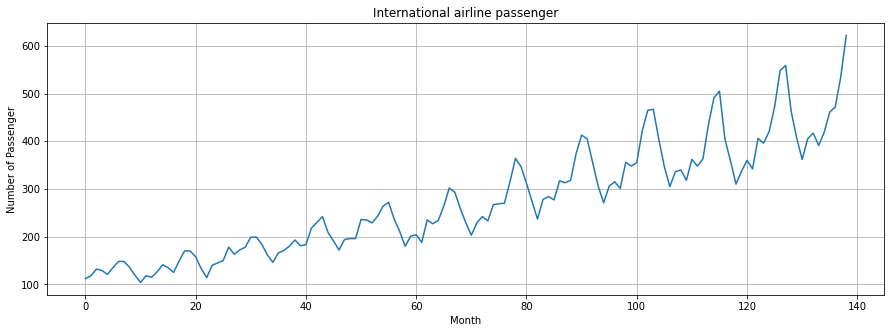

In [7]:
# Визуальный анализ набора 
airline_passengers_df = airline_passengers_df.iloc[:,1].values
plt.figure(figsize=(15,5))
plt.grid('on')
plt.plot(airline_passengers_df)
plt.xlabel("Month")
plt.ylabel("Number of Passenger")
plt.title("International airline passenger")
plt.show()

### Нормализация данных 

In [8]:
#Изменение формы дынных
airline_passengers_df = airline_passengers_df.reshape(-1,1)
airline_passengers_df = airline_passengers_df.astype("float32")
airline_passengers_df.shape

(139, 1)

In [9]:
# Масштабирование  
scaler = MinMaxScaler(feature_range=(0, 1))
airline_passengers_df_sc = scaler.fit_transform(airline_passengers_df)

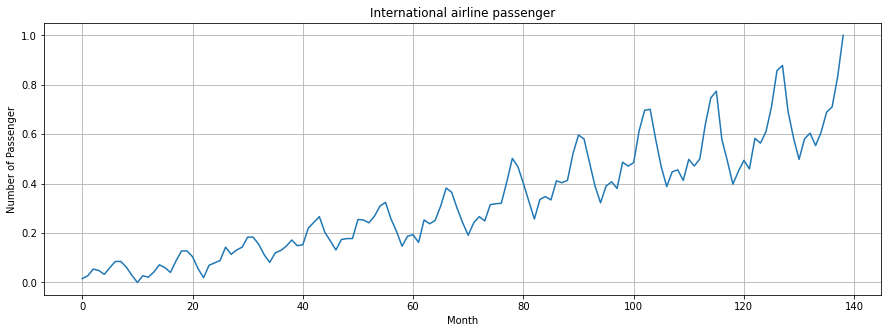

In [10]:
# Визуальный анализ набора после масштбирования 
plt.figure(figsize=(15,5))
plt.grid('on')
plt.plot(airline_passengers_df_sc)
plt.xlabel("Month")
plt.ylabel("Number of Passenger")
plt.title("International airline passenger")
plt.show()
plt.show()

### Подготовка данных

In [11]:
train_size = int(len(airline_passengers_df) * 0.60)
test_size = len(airline_passengers_df) - train_size
train = airline_passengers_df_sc[0:train_size,:]
test = airline_passengers_df_sc[train_size:len(airline_passengers_df),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 83, test size: 56 


In [12]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)  

In [13]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY) 

In [14]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print('shape of trainX: ', trainX.shape)
print('shape of testX: ', testX.shape)

shape of trainX:  (72, 10, 1)
shape of testX:  (45, 10, 1)


## Создание моделей нейронныйх сетей 

### RNN

In [17]:
# Входные данные модели 
model_input = Input(shape=(trainX.shape[1], 1))

# БЛОК 1: Рекурентные слои 
# Слой #1
x = SimpleRNN(100,activation='relu', return_sequences = True)(model_input)
x = Dropout(0.25)(x)
# Слой #2
x = SimpleRNN(80,activation='relu', return_sequences = True)(x)
x = Dropout(0.25)(x)
# Слой #3
x = SimpleRNN(50,activation='relu', return_sequences = True)(x)
x = Dropout(0.25)(x)
# Слой #4
x = SimpleRNN(30,activation='relu', return_sequences = True)(x)
x = Dropout(0.25)(x)
# Слой #5
x = SimpleRNN(units = 20)(x)
x = Dropout(0.25)(x)

# БЛОК 2: Полносвязанный слой 
x = Dense(1)(x)

# Создание модели 
model_1 = Model(model_input, x, name='rnn_1')

# Компиляция модели
model_1.compile(loss='mse', 
                optimizer='adam', 
                metrics=['mae'])


model_1.summary()
keras.utils.plot_model(model_1, "model.png")

The following Variables were used a Lambda layer's call (tf.keras.backend.rnn_10), but
are not present in its tracked objects:
  <tf.Variable 'simple_rnn_10/simple_rnn_cell_10/kernel:0' shape=(1, 100) dtype=float32>
  <tf.Variable 'simple_rnn_10/simple_rnn_cell_10/recurrent_kernel:0' shape=(100, 100) dtype=float32>
  <tf.Variable 'simple_rnn_10/simple_rnn_cell_10/bias:0' shape=(100,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.keras.backend.rnn_11), but
are not present in its tracked objects:
  <tf.Variable 'simple_rnn_11/simple_rnn_cell_11/kernel:0' shape=(100, 80) dtype=float32>
  <tf.Variable 'simple_rnn_11/simple_rnn_cell_11/recurrent_kernel:0' shape=(80, 80) dtype=float32>
  <tf.Variable 'simple_rnn_11/simple_rnn_cell_11/bias:0' shape=(80,) dtype=float32>
I

TypeError: Cannot convert a symbolic Keras input/output to a numpy array. This error may indicate that you're trying to pass a symbolic value to a NumPy call, which is not supported. Or, you may be trying to pass Keras symbolic inputs/outputs to a TF API that does not register dispatching, preventing Keras from automatically converting the API call to a lambda layer in the Functional Model.

### LSTM 

In [19]:
# Входные данные модели 
model_input = Input(shape=(trainX.shape[1], 1))

# БЛОК 1: Рекурентные слои 
# Слой #1
x = LSTM(10,activation='relu', return_sequences = True)(model_input)
x = Dropout(0.25)(x)

# БЛОК 2: Полносвязанный слой 
x = Dense(1)(x)

# Создание модели 
model_2 = Model(model_input, x, name='rnn_1')

# Компиляция модели
model_2.compile(loss='mse', 
                optimizer='adam', 
                metrics=['mae'])


model_2.summary()
keras.utils.plot_model(model_2, "model.png")

The following Variables were used a Lambda layer's call (tf.keras.backend.rnn_17), but
are not present in its tracked objects:
  <tf.Variable 'lstm_2/lstm_cell_2/kernel:0' shape=(1, 40) dtype=float32>
  <tf.Variable 'lstm_2/lstm_cell_2/recurrent_kernel:0' shape=(10, 40) dtype=float32>
  <tf.Variable 'lstm_2/lstm_cell_2/bias:0' shape=(40,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.tensordot_1), but
are not present in its tracked objects:
  <tf.Variable 'dense_4/kernel:0' shape=(10, 1) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.nn.bias_a

### GRU

In [21]:
# Входные данные модели 
model_input = Input(shape=(trainX.shape[1], 1))

# БЛОК 1: Рекурентные слои 
# Слой #1
x = GRU(128, return_sequences=True)(model_input)

# Слой #2
x = GRU(32)(x)

# БЛОК 2: Полносвязанный слой 
x = Dense(1)(x)

# Создание модели 
model_3 = Model(model_input, x, name='rnn_1')

# Компиляция модели
model_3.compile(loss='mse', 
                optimizer='adam', 
                metrics=['mae'])


model_3.summary()
keras.utils.plot_model(model_3, "model.png")

The following Variables were used a Lambda layer's call (tf.keras.backend.rnn_20), but
are not present in its tracked objects:
  <tf.Variable 'gru_2/gru_cell_2/kernel:0' shape=(1, 384) dtype=float32>
  <tf.Variable 'gru_2/gru_cell_2/recurrent_kernel:0' shape=(128, 384) dtype=float32>
  <tf.Variable 'gru_2/gru_cell_2/bias:0' shape=(384,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.keras.backend.rnn_21), but
are not present in its tracked objects:
  <tf.Variable 'gru_3/gru_cell_3/kernel:0' shape=(128, 96) dtype=float32>
  <tf.Variable 'gru_3/gru_cell_3/recurrent_kernel:0' shape=(32, 96) dtype=float32>
  <tf.Variable 'gru_3/gru_cell_3/bias:0' shape=(96,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a stron

TypeError: Cannot convert a symbolic Keras input/output to a numpy array. This error may indicate that you're trying to pass a symbolic value to a NumPy call, which is not supported. Or, you may be trying to pass Keras symbolic inputs/outputs to a TF API that does not register dispatching, preventing Keras from automatically converting the API call to a lambda layer in the Functional Model.